In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

print("Libraries imported successfully.")



Libraries imported successfully.


In [3]:

file_path = '../data/data.csv' # Assuming the project structure

# Load the dataset
try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}")
    print("Please update the file_path variable to the correct location of your dataset.")
    df = None


Dataset loaded successfully.


In [4]:
# In[3]:
if not df.empty:
    # Display the first 5 rows
    print("First 5 rows of the dataset:")
    display(df.head())

    # Display concise summary of the dataframe
    print("\nDataframe Info:")
    df.info()

First 5 rows of the dataset:


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0



Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  Fr

In [ ]:
# In[4]:
if not df.empty:
    
    # Get summary statistics for numerical columns
    print("Summary Statistics for Numerical Columns:")
    display(df.describe())

    # Check for missing values
    print("\nMissing Values per Column:")
    print(df.isnull().sum())

Summary Statistics for Numerical Columns:


,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000



Missing Values per Column:
TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64


In [6]:
# In[5]:
if not df.empty:
    # Convert 'TransactionStartTime' to datetime objects
    df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])

    # Extract temporal features for later analysis
    df['TransactionHour'] = df['TransactionStartTime'].dt.hour
    df['TransactionDayOfWeek'] = df['TransactionStartTime'].dt.dayofweek # Monday=0, Sunday=6
    df['TransactionDate'] = df['TransactionStartTime'].dt.date

    print("Converted 'TransactionStartTime' to datetime and extracted temporal features.")
    display(df[['TransactionStartTime', 'TransactionHour', 'TransactionDayOfWeek']].head())

Converted 'TransactionStartTime' to datetime and extracted temporal features.


,TransactionStartTime,TransactionHour,TransactionDayOfWeek
0,2018-11-15 02:18:49+00:00,2,3
1,2018-11-15 02:19:08+00:00,2,3
2,2018-11-15 02:44:21+00:00,2,3
3,2018-11-15 03:32:55+00:00,3,3
4,2018-11-15 03:34:21+00:00,3,3


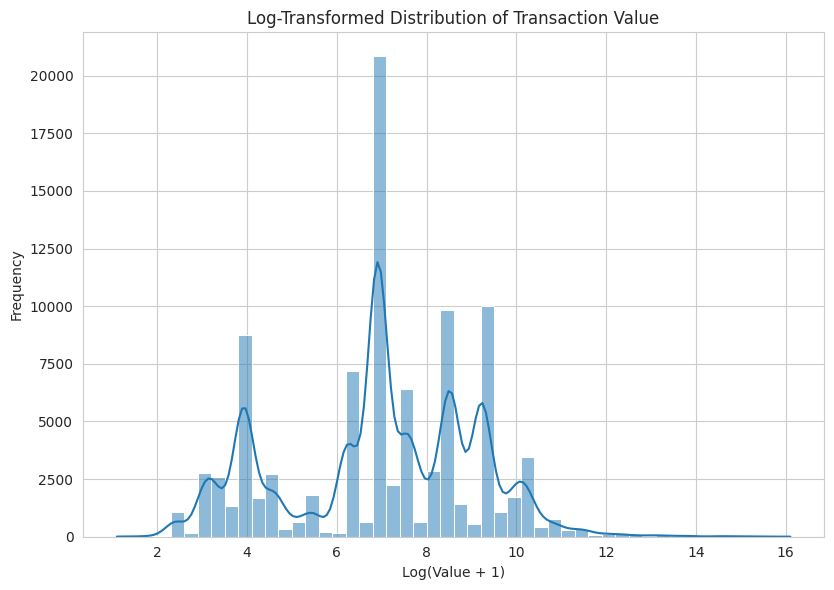

In [8]:
# In[6]:
if not df.empty:
    plt.figure(figsize=(16, 6))

    # To better see the distribution of smaller values, we can plot on a log scale
    # Adding 1 to avoid log(0) errors
    plt.subplot(1, 2, 2)
    sns.histplot(np.log1p(df['Value']), bins=50, kde=True)
    plt.title('Log-Transformed Distribution of Transaction Value')
    plt.xlabel('Log(Value + 1)')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

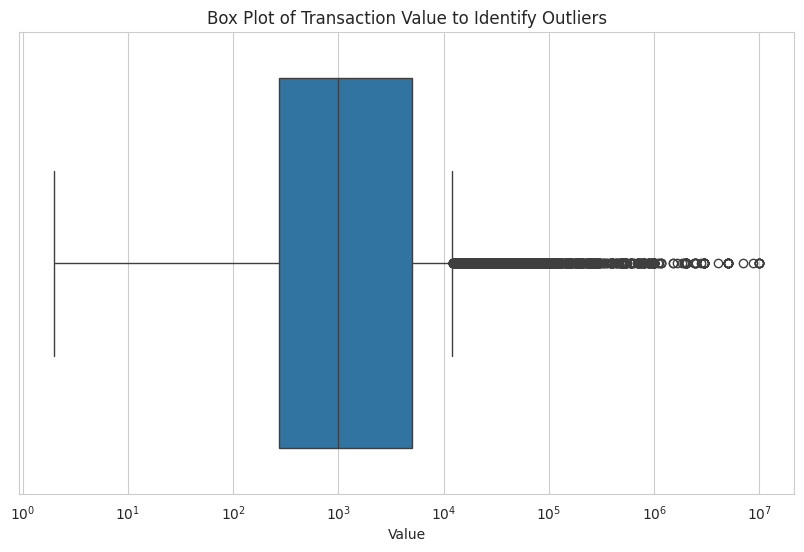

In [9]:
# In[7]:
if not df.empty:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df['Value'])
    plt.title('Box Plot of Transaction Value to Identify Outliers')
    plt.xscale('log') # Use a log scale to better visualize the range
    plt.show()

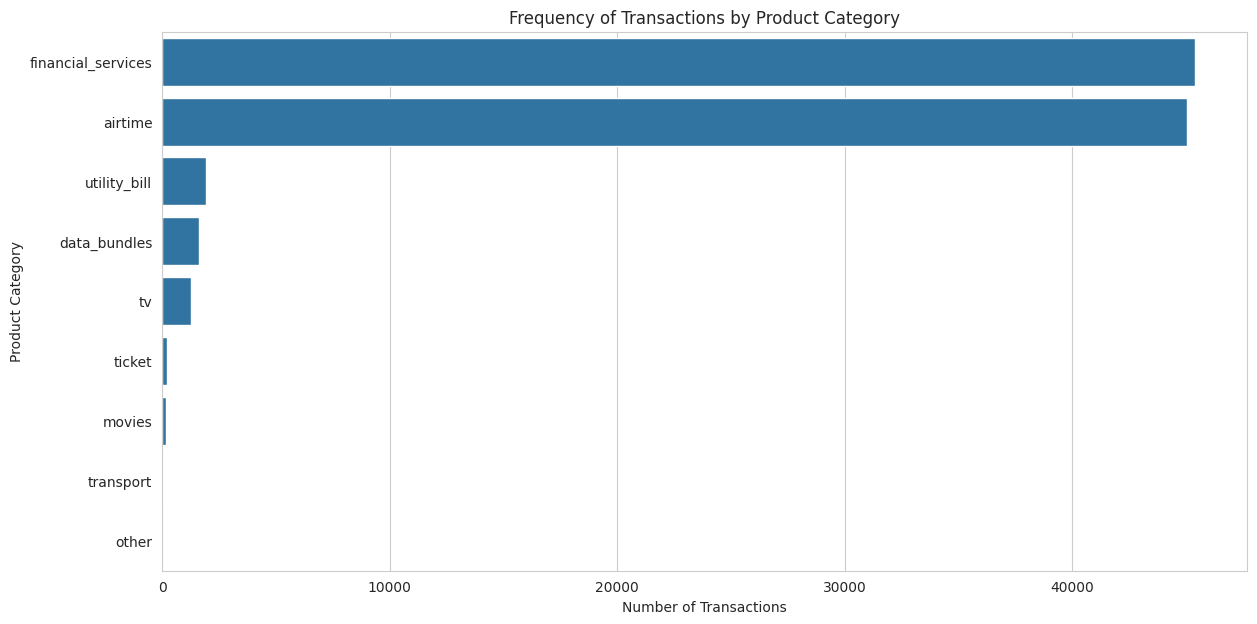

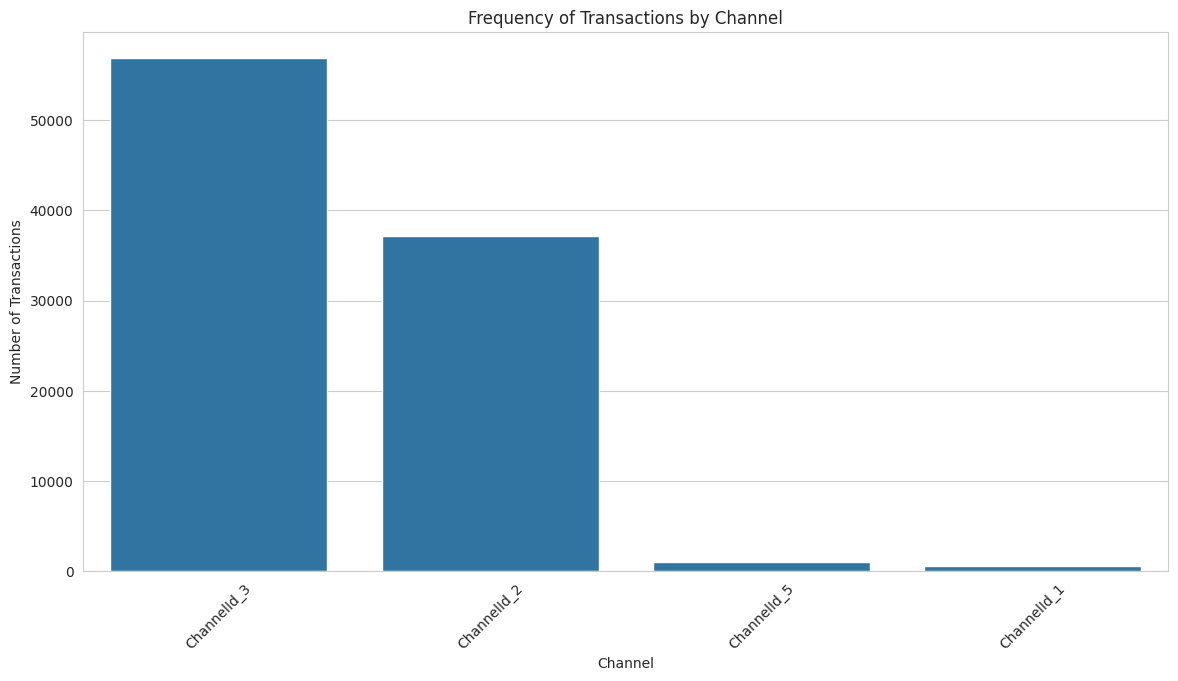

In [ ]:
df.ChannelId.replace("ChannelId")

# In[8]:
if not df.empty:
    # Plot for Product Category
    plt.figure(figsize=(14, 7))
    sns.countplot(y=df['ProductCategory'], order=df['ProductCategory'].value_counts().index)
    plt.title('Frequency of Transactions by Product Category')
    plt.xlabel('Number of Transactions')
    plt.ylabel('Product Category')
    plt.show()

    # Plot for Channel ID
    plt.figure(figsize=(14, 7))
    sns.countplot(x=df['ChannelId'], order=df['ChannelId'].value_counts().index)
    plt.title('Frequency of Transactions by Channel')
    plt.xlabel('Channel')
    plt.ylabel('Number of Transactions')
    plt.xticks(rotation=45)
    plt.show()

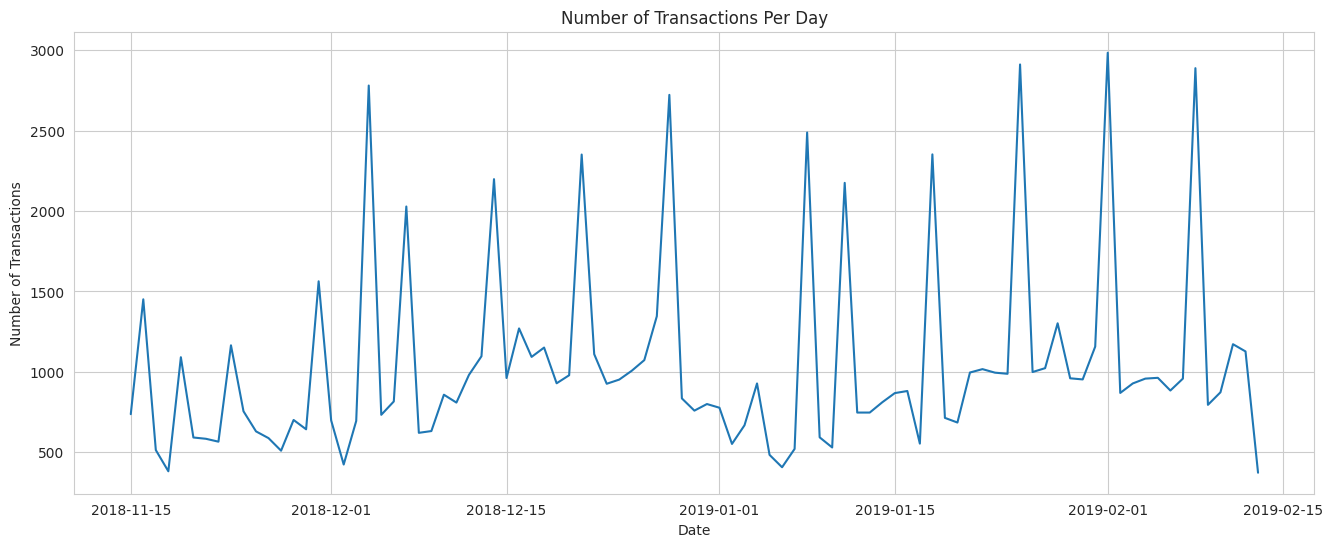

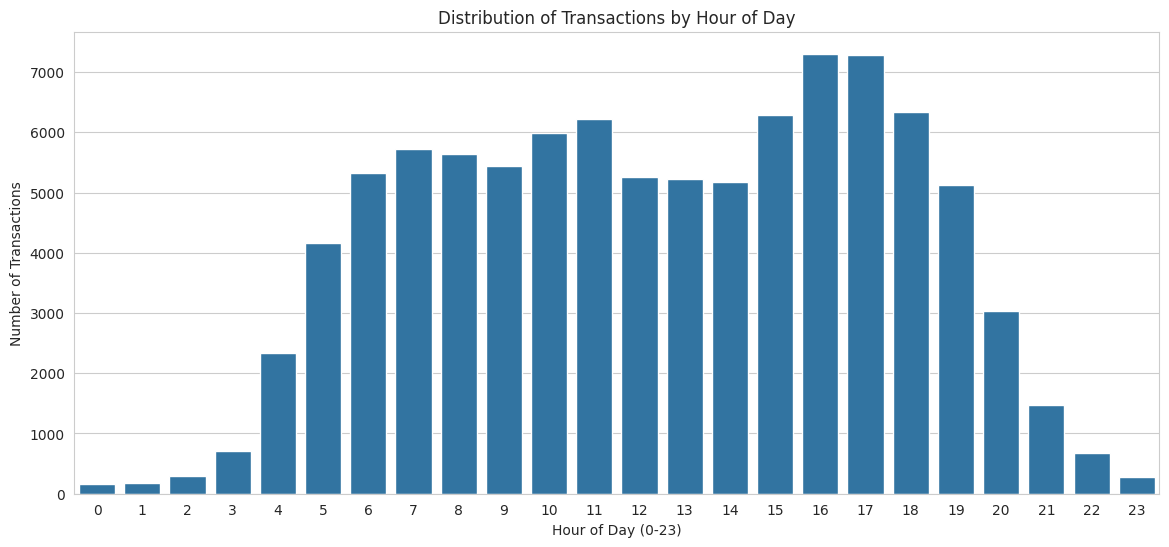

In [ ]:


# In[9]:
if not df.empty:
    # Transactions per day
    transactions_per_day = df.groupby('TransactionDate').size()
    plt.figure(figsize=(16, 6))
    transactions_per_day.plot()
    plt.title('Number of Transactions Per Day')
    plt.xlabel('Date')
    plt.ylabel('Number of Transactions')
    plt.show()

    # Transactions by hour of day
    plt.figure(figsize=(14, 6))
    sns.countplot(x='TransactionHour', data=df)
    plt.title('Distribution of Transactions by Hour of Day')
    plt.xlabel('Hour of Day (0-23)')
    plt.ylabel('Number of Transactions')
    plt.show()

Calculating the correlation matrix for numerical features...


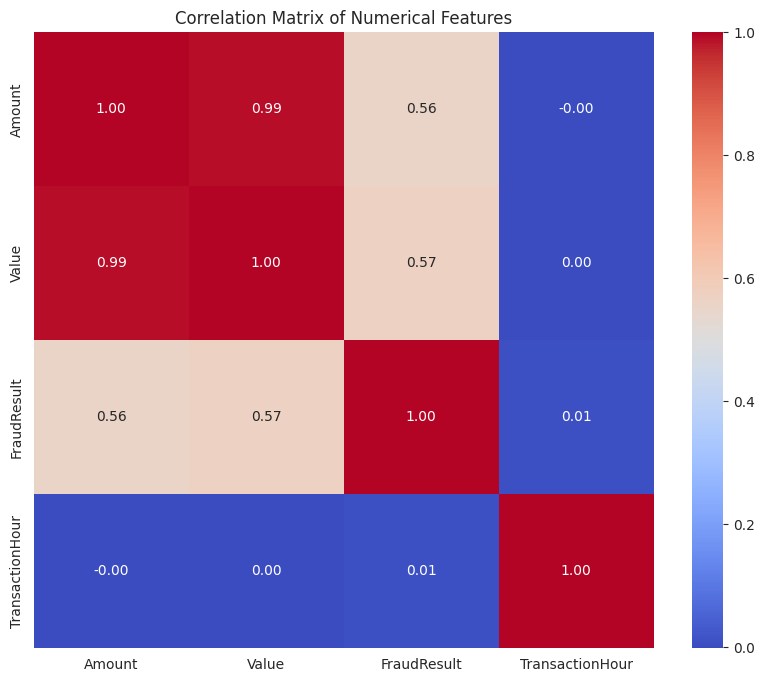


Correlation Matrix:


,Amount,Value,FraudResult,TransactionHour
Amount,1.000000,0.989692,0.557370,-0.001611
Value,0.989692,1.000000,0.566739,0.000474
FraudResult,0.557370,0.566739,1.000000,0.008295
TransactionHour,-0.001611,0.000474,0.008295,1.000000


In [12]:
# In[11]:
if not df.empty:
    # Select only the numerical columns for the correlation analysis
    # We include 'FraudResult' as it's a binary numerical flag (0 or 1)
    numerical_cols = ['Amount', 'Value', 'FraudResult', 'TransactionHour']
    
    print("Calculating the correlation matrix for numerical features...")
    correlation_matrix = df[numerical_cols].corr()

    # Create a heatmap to visualize the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        correlation_matrix, 
        annot=True,        # Display the correlation values on the heatmap
        cmap='coolwarm',   # Use a color map that's good for correlations (blue-red)
        fmt=".2f"          # Format the numbers to two decimal places
    )
    plt.title('Correlation Matrix of Numerical Features')
    plt.show()

    # Display the correlation matrix as a table
    print("\nCorrelation Matrix:")
    display(correlation_matrix)